In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks-reviews-dataset/reviews_data.csv


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("/kaggle/input/starbucks-reviews-dataset/reviews_data.csv")

In [4]:
df 


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


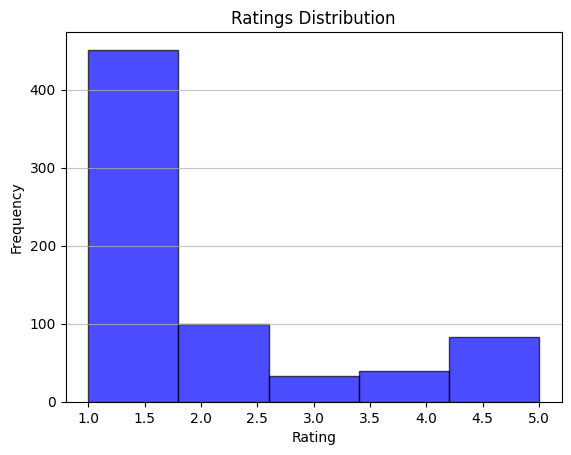

In [5]:
import matplotlib.pyplot as plt
plt.hist(df['Rating'], bins=5, color='blue', alpha=0.7, edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [6]:
df.isnull().sum()

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
dtype: int64

In [7]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)

<ipython-input-7-869df3053cb6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)


In [8]:
df

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",1.0,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",1.0,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",1.0,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",1.0,No Review Text,['No Images']


In [9]:
df.isnull().sum()

name           0
location       0
Date           0
Rating         0
Review         0
Image_Links    0
dtype: int64

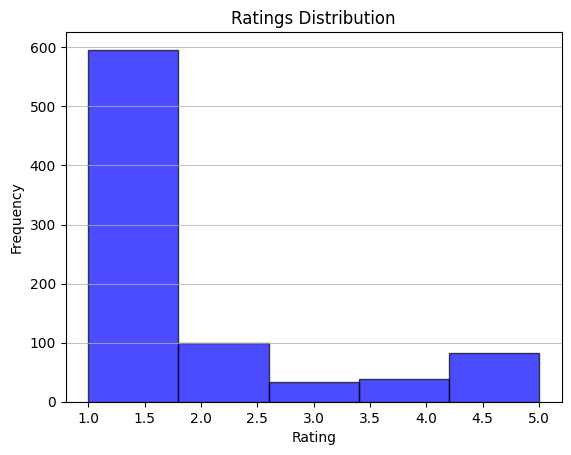

In [10]:
import matplotlib.pyplot as plt
plt.hist(df['Rating'], bins=5, color='blue', alpha=0.7, edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

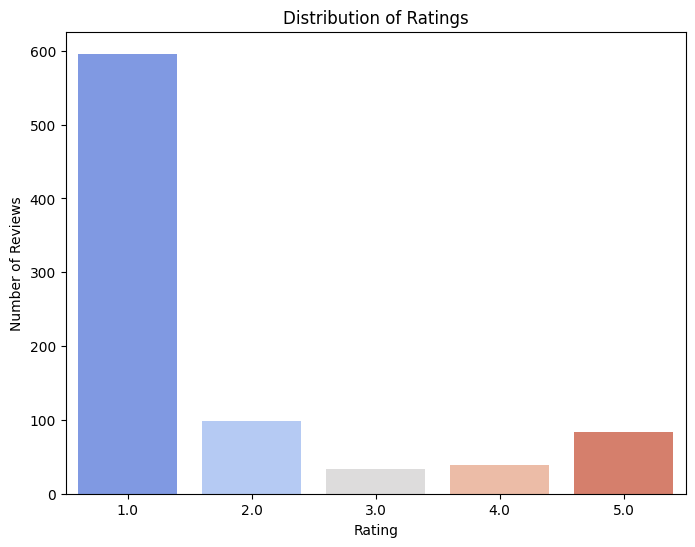

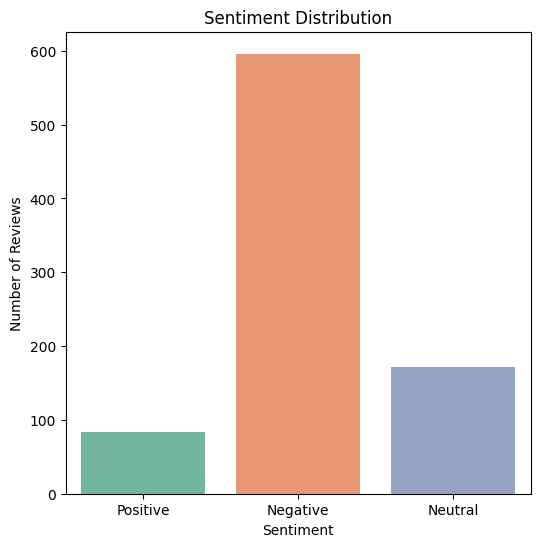

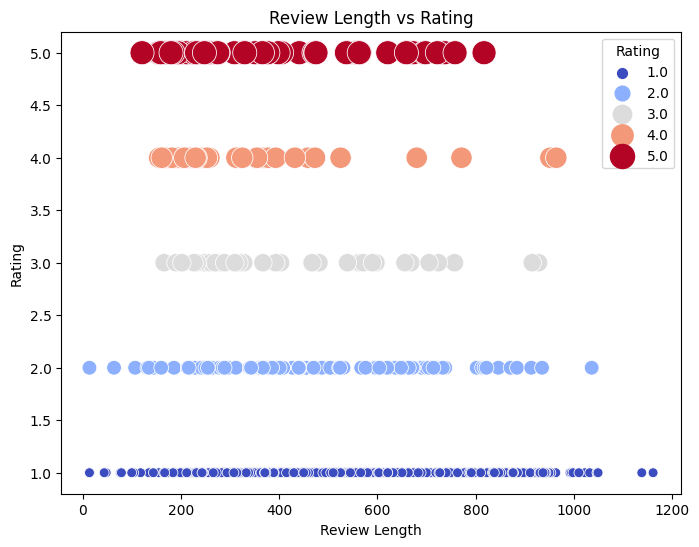

In [11]:
import seaborn as sns
# 1. **Distribution of Ratings**
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df, palette='coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


# 2. **Sentiment Analysis (Example)**
# For simplicity, assuming that 5 is positive, 1 is negative, and others are neutral.
df['Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x == 5 else ('Negative' if x == 1 else 'Neutral'))

plt.figure(figsize=(6, 6))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# 3. **Review Length vs Rating**
df['Review_Length'] = df['Review'].apply(len)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Review_Length', y='Rating', data=df, hue='Rating', palette='coolwarm', size='Rating', sizes=(50, 300))
plt.title('Review Length vs Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

In [12]:
# Prepare text data (X) and ratings (Y)
X = df['Review']
y = df['Rating']


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()  # Removed num_words to allow for unlimited vocabulary size
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [15]:
max_len = max([len(seq) for seq in X_seq])
max_len

219

In [16]:
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')

In [17]:
y_encoded = y


In [18]:
y

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
845    1.0
846    1.0
847    1.0
848    1.0
849    1.0
Name: Rating, Length: 850, dtype: float64

In [19]:
y_encoded

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
845    1.0
846    1.0
847    1.0
848    1.0
849    1.0
Name: Rating, Length: 850, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)


In [21]:
X_train.shape

(680, 219)

In [22]:
X_train[0].shape

(219,)

In [23]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Build the RNN model
model = Sequential()

# Add an explicit Input layer (not strictly necessary but for clarity)
model.add(Input(shape=(max_len,)))

# Embedding layer: Converts word indices into dense vectors
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len))

# Add an RNN layer (LSTM)
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

# Add a dense layer with softmax activation to predict ratings
model.add(LSTM(units=32))  # Final LSTM layer
model.add(Dense(6, activation='softmax'))  # Output layer (ratings from 0 to 5)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 219, 128)            │         792,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 219, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 219, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 854,086 (3.26 MB)

 Trainable params: 854,086 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:

# Compile the model with sparse categorical cross-entropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [26]:

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)


In [27]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5851 - loss: 1.4276 - val_accuracy: 0.6471 - val_loss: 1.1788
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7223 - loss: 0.9618 - val_accuracy: 0.6471 - val_loss: 1.1143
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7177 - loss: 0.9689 - val_accuracy: 0.6471 - val_loss: 1.1257
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7065 - loss: 0.9874 - val_accuracy: 0.6471 - val_loss: 1.1206
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7269 - loss: 0.9494 - val_accuracy: 0.6471 - val_loss: 1.1215
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7018 - loss: 1.0000 - val_accuracy: 0.6471 - val_loss: 1.1263
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7095 - loss: 0.9791 - val_accuracy: 0.6471 - val_loss: 1.1160
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6863 - loss: 1.0320 - val_accuracy: 0.6471 - v

In [28]:
accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy[1]*100:.2f}%')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6231 - loss: 1.1572 
Test accuracy: 64.71%


In [29]:
def predict_sentiment(review_text):
    sample_seq = tokenizer.texts_to_sequences([review_text])
    sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding='post')
    predicted_sentiment = model.predict(sample_pad)
    predicted_class = predicted_sentiment.argmax(axis=1)  # Get the predicted class (0=Positive, 1=Negative, 2=Neutral)
    
    # Map the predicted class back to the sentiment labels
    sentiment_labels = ['Positive', 'Negative', 'Neutral']
    return sentiment_labels[predicted_class[0]]

# Example input
input_review = input("Enter your review: ")
predicted_sentiment = predict_sentiment(input_review)
print(f'Predicted Sentiment: {predicted_sentiment}')


Enter your review:  i love it 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Predicted Sentiment: Negative


In [30]:
def predict_sentiment(review_text):
    sample_seq = tokenizer.texts_to_sequences([review_text])
    sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding='post')
    predicted_sentiment = model.predict(sample_pad)
    predicted_class = predicted_sentiment.argmax(axis=1)  # Get the predicted class (0=Positive, 1=Negative, 2=Neutral)
    
    # Map the predicted class back to the sentiment labels
    sentiment_labels = ['Positive', 'Negative', 'Neutral']
    return sentiment_labels[predicted_class[0]]

# Example input
input_review = input("Enter your review: ")
predicted_sentiment = predict_sentiment(input_review)
print(f'Predicted Sentiment: {predicted_sentiment}')


Enter your review:  i hate it 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Sentiment: Negative


In [31]:

def predict_sentiment(review_text):
    # Tokenize and pad the input review
    sample_seq = tokenizer.texts_to_sequences([review_text])
    sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding='post')
    
    # Predict sentiment class
    predicted_class = model.predict(sample_pad).argmax(axis=1)
    
    # Map to sentiment labels
    sentiment_labels = ['Positive', 'Negative', 'Neutral']
    return sentiment_labels[predicted_class[0]]

# Example input
input_review = input("Enter your review: ")
predicted_sentiment = predict_sentiment(input_review)
print(f'Predicted Sentiment: {predicted_sentiment}')

Enter your review:  ok 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Sentiment: Negative


In [34]:
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y_encoded)

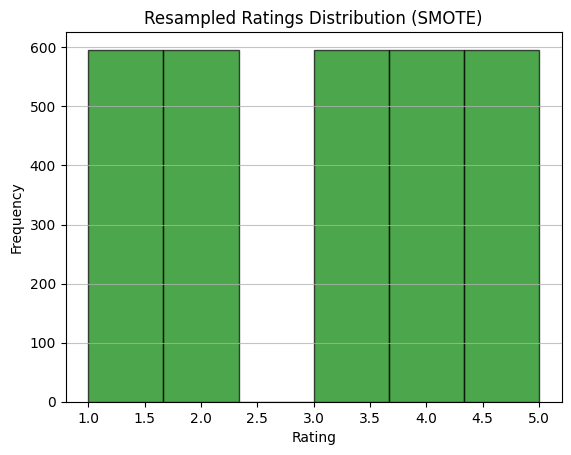

In [43]:
# Plotting resampled class distribution (after SMOTE)
plt.hist(y_resampled, bins=6, color='green', alpha=0.7, edgecolor='black')
plt.title('Resampled Ratings Distribution (SMOTE)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [45]:
X_train.shape

(2384, 219)

In [47]:
# Find the maximum length of the reviews in the dataset
max_len = max([len(seq) for seq in X_seq])
max_len

219

In [50]:

# Build the RNN model
model = Sequential()

# Input layer (added this explicitly)
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len))

# LSTM layer
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

# Final LSTM layer
model.add(LSTM(units=32))

# Output layer with softmax activation
model.add(Dense(6, activation='softmax'))  # Output layer (ratings from 0 to 5)

# Compile the model using sparse categorical cross-entropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback (optional)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy[1]*100:.2f}%')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.2023 - loss: 1.7087 - val_accuracy: 0.2164 - val_loss: 1.6193
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1937 - loss: 1.6249 - val_accuracy: 0.1829 - val_loss: 1.6281
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2029 - loss: 1.6222 - val_accuracy: 0.1829 - val_loss: 1.6222
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1830 - loss: 1.6195 - val_accuracy: 0.1846 - val_loss: 1.6181
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2115 - loss: 1.6116 - val_accuracy: 0.1980 - val_loss: 1.6162
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2073 - loss: 1.6142 - val_accuracy: 0.2081 - val_loss: 1.6117
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2030 - loss: 1.6149 - val_accuracy: 0.2097 - val_loss: 1.6129
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1937 - loss: 1.6127 - val_accuracy: 0.2198 - val_loss: 1.

Enter your review:  i love it


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Predicted Rating: 3


In [58]:
# Sample prediction function
def predict_sentiment(review_text):
    sample_seq = tokenizer.texts_to_sequences([review_text])
    sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding='post')
    predicted_sentiment = model.predict(sample_pad)
    predicted_class = predicted_sentiment.argmax(axis=1)  # Get the predicted class (0=Rating 0, 1=Rating 1, etc.)
    
    # Map the predicted class (0-5) to sentiment labels
    if predicted_class[0] in [0, 1, 2]:
        sentiment = "Negative"
    elif predicted_class[0] == 3:
        sentiment = "Neutral"
    else:
        sentiment = "Positive"
    
    return sentiment

# Example input
input_review = input("Enter your review: ")
predicted_sentiment = predict_sentiment(input_review)
print(f'Predicted Sentiment: {predicted_sentiment}')


Enter your review:  ok


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Sentiment: Neutral


In [59]:
# Sample prediction function
def predict_sentiment(review_text):
    sample_seq = tokenizer.texts_to_sequences([review_text])
    sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding='post')
    predicted_sentiment = model.predict(sample_pad)
    predicted_class = predicted_sentiment.argmax(axis=1)  # Get the predicted class (0=Rating 0, 1=Rating 1, etc.)
    
    # Map the predicted class (0-5) to sentiment labels
    if predicted_class[0] in [0, 1, 2]:
        sentiment = "Negative"
    elif predicted_class[0] == 3:
        sentiment = "Neutral"
    else:
        sentiment = "Positive"
    
    return sentiment

# Example input
input_review = input("Enter your review: ")
predicted_sentiment = predict_sentiment(input_review)
print(f'Predicted Sentiment: {predicted_sentiment}')


Enter your review:  hate it 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Sentiment: Neutral


In [63]:

# Build the complex LSTM model
model = Sequential()

# Add an embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len))

# Add Spatial Dropout for better regularization
model.add(SpatialDropout1D(0.3))

# First LSTM layer (Bidirectional for more power)
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Dropout(0.4))

# Second LSTM layer
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Dropout(0.4))

# Third LSTM layer
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.3))

# Fourth LSTM layer
model.add(Bidirectional(LSTM(units=128)))
model.add(Dropout(0.3))

# Batch Normalization for stability
model.add(BatchNormalization())

# Fully connected dense layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

# Output layer with softmax activation for multi-class classification
model.add(Dense(6, activation='softmax'))  # Output for 6 classes (ratings from 0 to 5)

# Compile the model with sparse categorical crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy[1]*100:.2f}%')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.2238 - loss: 1.8021 - val_accuracy: 0.3826 - val_loss: 1.6976
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.3684 - loss: 1.5233 - val_accuracy: 0.4312 - val_loss: 1.5246
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.4550 - loss: 1.2946 - val_accuracy: 0.4077 - val_loss: 1.5385
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.5051 - loss: 1.1601 - val_accuracy: 0.4094 - val_loss: 1.4065
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.5842 - loss: 0.9765 - val_accuracy: 0.4279 - val_loss: 1.3806
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.6325 - loss: 0.8736 - val_accuracy: 0.3909 - val_loss: 1.4674
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.6682 - loss: 0.7738 - val_accuracy: 0.3977 - val_loss: 1.7585
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.7557 - loss: 0.6229 - val_accuracy: 0.4312 - val

In [64]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, SpatialDropout1D, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE

In [66]:

# Build the complex LSTM model
model = Sequential()

# Add an embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256, input_length=max_len))

# Add Spatial Dropout for better regularization
model.add(SpatialDropout1D(0.4))

# First LSTM layer (Bidirectional for more power)
model.add(Bidirectional(LSTM(units=512, return_sequences=True, kernel_regularizer=l2(0.01))))
model.add(Dropout(0.5))

# Second LSTM layer
model.add(Bidirectional(LSTM(units=512, return_sequences=True, kernel_regularizer=l2(0.01))))
model.add(Dropout(0.5))

# Third LSTM layer with Global Max Pooling for better abstraction
model.add(Bidirectional(LSTM(units=256, return_sequences=True, kernel_regularizer=l2(0.01))))
model.add(Dropout(0.5))

model.add(GlobalMaxPooling1D())  # Reduce the sequence dimension to a fixed size

# Add more Dense layers for deeper learning
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))

# Output layer with softmax activation for multi-class classification
model.add(Dense(6, activation='softmax'))  # Output for 6 classes (ratings from 0 to 5)

# Compile the model with Adam optimizer and a custom learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Callbacks: Early stopping and ReduceLROnPlateau for more optimized training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model with EarlyStopping callback
model.fit(X_train, y_train, epochs=250, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy[1]*100:.2f}%')


Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 340ms/step - accuracy: 0.2141 - loss: 54.0908 - val_accuracy: 0.1980 - val_loss: 22.6080 - learning_rate: 5.0000e-04
Epoch 2/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 319ms/step - accuracy: 0.2062 - loss: 17.6649 - val_accuracy: 0.1946 - val_loss: 8.0734 - learning_rate: 5.0000e-04
Epoch 3/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 320ms/step - accuracy: 0.2059 - loss: 6.7047 - val_accuracy: 0.2181 - val_loss: 4.1128 - learning_rate: 5.0000e-04
Epoch 4/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 320ms/step - accuracy: 0.2043 - loss: 3.6817 - val_accuracy: 0.1946 - val_loss: 2.8626 - learning_rate: 5.0000e-04
Epoch 5/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 319ms/step - accuracy: 0.1881 - loss: 2.7079 - val_accuracy: 0.1946 - val_loss: 2.3649 - learning_rate: 5.0000e-04
Epoch 6/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 319ms/step - accuracy: 0.1940 - loss: 2.2898 - val_accuracy: 0.2181 - val_loss: 2.1140 - learning_rate: 5.0000e-04
Epoch 7/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 319ms/step - accur

In [67]:
def predict_sentiment(review_text):
    # Tokenize and pad the input review
    sample_seq = tokenizer.texts_to_sequences([review_text])
    sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding='post')
    
    # Predict sentiment class (0=Rating 0, 1=Rating 1, etc.)
    predicted_sentiment = model.predict(sample_pad)
    predicted_class = predicted_sentiment.argmax(axis=1)
    
    # Map to sentiment labels
    sentiment_labels = ['Positive', 'Negative', 'Neutral', 'Very Negative', 'Very Positive', 'Mixed']
    return sentiment_labels[predicted_class[0]]

# Example input
input_review = input("Enter your review: ")
predicted_sentiment = predict_sentiment(input_review)
print(f'Predicted Rating: {predicted_sentiment}')


Enter your review:  love it 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
Predicted Rating: Very Positive
